In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
#style.use("fivethirtyeight")
pd.set_option("display.float_format", lambda x: "%.5f" % x)
pd.set_option("max_columns", None)

### App criteria

*https://appinventiv.com/blog/how-to-get-your-app-featured-in-play-store/*
- Does not belong to saturated category
- decent ratings and installs
- apps must have at least 1 review and install
- Free apps with in-app ads

Selected by Google Play team 

Featured: Selected new apps 
Staff Picks: Rotating set of staff-selected apps 

**Editors’ Choice: Some of the best Android apps of all-time on Google Play**

Top Developer: Some of the best developers on Google Play

With all said and done, let us now look into the ways on how to get your app noticed on Google Play and then get it featured on the Play Store and maybe even come in the list of Editor’s Choice. These ways are a sure fire way to get an answer to the question― how to get your app featured on google play?

In [2]:
df = pd.read_csv("Google-Playstore.csv")

In [3]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [4]:
# Missing data sorted descending
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

Developer Website   32.89466
Privacy Policy      18.19988
Released             3.07197
Rating               0.98935
Rating Count         0.98935
Minimum Android      0.28232
Size                 0.00847
Currency             0.00584
Installs             0.00463
Minimum Installs     0.00463
Developer Id         0.00143
Developer Email      0.00134
App Name             0.00009
App Id               0.00000
Price                0.00000
Free                 0.00000
Maximum Installs     0.00000
Last Updated         0.00000
Content Rating       0.00000
Category             0.00000
Ad Supported         0.00000
In App Purchases     0.00000
Editors Choice       0.00000
Scraped Time         0.00000
dtype: float64

In [5]:
# Numeric columns summarized
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2290061.00000,2290061.00000,2312837.00000,2312944.00000,2312944.00000
mean,2.20315,2864.83888,183445.21396,320201.71314,0.10350
std,2.10622,212162.57104,15131439.05973,23554954.88655,2.63313
min,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,50.00000,84.00000,0.00000
50%,2.90000,6.00000,500.00000,695.00000,0.00000
75%,4.30000,42.00000,5000.00000,7354.00000,0.00000
max,5.00000,138557570.00000,10000000000.00000,12057627016.00000,400.00000


In [6]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.00000,0.00000,10+,10.00000,15,True,0.00000,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.40000,64.00000,"5,000+",5000.00000,7662,True,0.00000,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.00000,0.00000,50+,50.00000,58,True,0.00000,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.00000,5.00000,10+,10.00000,19,True,0.00000,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.00000,0.00000,100+,100.00000,478,True,0.00000,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


### Vague columns

In [7]:
df["Privacy Policy"].value_counts()

http://www.subsplash.com/legal/privacy                                            7481
https://unity3d.com/legal/privacy-policy                                          5312
http://www.trainerize.com/privacy.aspx                                            5181
http://www.chownow.com/privacy-policy                                             4783
https://classplusapp.com/privacy.html                                             4373
                                                                                  ... 
https://protsak2017.blogspot.com/2017/11/wallpaper-privacy-policy.html               1
http://aplus-development.com/policy/schoolapp/policy.php?app=4365&lg=en              1
https://www.rewindit.fm/privacy.html                                                 1
https://app.appmobilecity.com/application/privacypolicy/index/id/6008776bb8c57       1
https://biliyor-musun-sons.flycricket.io/privacy.html                                1
Name: Privacy Policy, Length: 977743, dtype

In [8]:
# Looks like android version minimum, probably not too neccessary
df["Minimum Android"].value_counts()

4.1 and up      604465
5.0 and up      396998
4.4 and up      390311
4.0.3 and up    180482
4.0 and up      153441
                 ...  
2.3 - 3.2            1
6.0 - 7.1.1          1
2.3 - 8.0            1
3.0 - 7.1.1          1
2.3.3 - 6.0          1
Name: Minimum Android, Length: 154, dtype: int64

In [9]:
# Developer name/company
df["Developer Id"].value_counts()

Subsplash Inc         5422
TRAINERIZE            5153
ChowNow               4865
OrderYOYO             2884
Phorest               2821
                      ... 
Jack Troshinsky          1
ITIPER                   1
East Point Systems       1
Yılmaz İsmail            1
Eventi                   1
Name: Developer Id, Length: 758371, dtype: int64

In [10]:
df["Editors Choice"].value_counts()

False    2312091
True         853
Name: Editors Choice, dtype: int64

In [11]:
df["Rating Count"].value_counts()

0.00000          1059762
5.00000            64288
6.00000            54325
7.00000            46838
8.00000            40585
                  ...   
9028.00000             1
27999.00000            1
1271735.00000          1
29786.00000            1
78351.00000            1
Name: Rating Count, Length: 38482, dtype: int64

In [12]:
df["Installs"].value_counts()

100+               443368
1,000+             398199
10+                300156
10,000+            256723
500+               189077
50+                170465
5,000+             143593
100,000+           110257
50,000+             75359
5+                  73772
1+                  65345
1,000,000+          33650
500,000+            27012
0+                  11566
5,000,000+           6595
10,000,000+          6192
50,000,000+           824
100,000,000+          549
500,000,000+           65
1,000,000,000+         55
5,000,000,000+         14
10,000,000,000+         1
Name: Installs, dtype: int64

In [13]:
df.sample(15, random_state= 40)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
978208,Salario Mínimo MX,app.agsolutions.abraham.salariomnimomx,Finance,0.00000,0.00000,500+,500.00000,867,True,0.00000,USD,2.7M,4.1 and up,AG Solutions,NaN,agsolutions96@gmail.com,"Jan 19, 2019","Jan 26, 2019",Everyone,NaN,True,False,False,2021-06-16 11:58:01
788953,Dope - Attitude Wallpaper Hd - Motivational Qu...,com.vicky.wallpaperapp,Personalization,4.30000,75.00000,"10,000+",10000.00000,22253,True,0.00000,USD,11M,5.0 and up,Vicky Appss,NaN,hello@vickyapps.xyz,"Mar 24, 2020","Oct 21, 2020",Everyone,http://vickyapps.xyz/privacy-policy-wallpaper-...,True,False,False,2021-06-16 09:01:46
1503773,Music Player : No ads,com.dibandroid.softwareltdnfmusic,Music & Audio,3.40000,38.00000,"5,000+",5000.00000,5363,True,0.00000,USD,2.5M,5.0 and up,dib android software,NaN,dibsoftltd@gmail.com,"Feb 20, 2020","Feb 20, 2020",Teen,https://skydoctorbd.blogspot.com/p/music-playe...,False,False,False,2021-06-16 01:25:38
815844,Pung Kang Noodle House,com.chownow.pungkangnoodlehouse,Food & Drink,0.00000,0.00000,10+,10.00000,26,True,0.00000,USD,17M,5.0 and up,ChowNow,http://www.chownow.com,eng-android@chownow.com,"Jul 14, 2016","Feb 16, 2020",Everyone,http://www.chownow.com/privacy-policy,False,False,False,2021-06-16 09:26:50
210301,"Sorah ""REHMAN""",com.sialapps.sorah.rehman,Social,0.00000,0.00000,100+,100.00000,228,True,0.00000,USD,35M,2.0 and up,sialapps,NaN,sialapps12@gmail.com,"Jun 24, 2017","Jun 24, 2017",Teen,NaN,True,False,False,2021-06-15 23:53:11
228440,Fly and Spiders,info.fandroid.android,Arcade,4.70000,71.00000,"1,000+",1000.00000,2322,True,0.00000,USD,3.4M,2.3 and up,FandroidApps,http://www.fandroid.info,flygame@fandroid.info,"Dec 18, 2015","Jan 04, 2016",Everyone,NaN,True,False,False,2021-06-16 00:15:05
1035656,Asian Boulevard VIP,nl.loyaltygroup.asianboulevard,Food & Drink,0.00000,0.00000,500+,500.00000,724,True,0.00000,USD,18M,4.4 and up,Loyaltygroup BV,https://asianboulevard.nl/,info@asianboulevard.nl,"Nov 13, 2019","Feb 27, 2020",Mature 17+,https://www.loyaltygroup.nl/wp-content/privacy...,False,False,False,2021-06-16 12:52:59
582159,udn 售票網,com.udn.udntickets,Entertainment,1.80000,325.00000,"100,000+",100000.00000,127285,True,0.00000,USD,13M,4.4 and up,United Daily News Group,https://tickets.udnfunlife.com,cs.tickets@udnfunlife.com,"Nov 24, 2015","Oct 16, 2019",Everyone,http://www.udngroup.com/information/privacy,False,False,False,2021-06-16 05:49:09
1970053,ماجد المهندس - محلا اللقى (بدون الإنترنت) 2020,com.eltudo.maji,Music & Audio,0.00000,0.00000,100+,100.00000,277,True,0.00000,USD,21M,4.0.3 and up,tudo,NaN,eltudo2016@gmail.com,"Feb 17, 2020","Feb 17, 2020",Everyone,NaN,True,False,False,2021-06-16 07:59:57
729396,Jazz Radio Free,com.jazzradiogratis.jaazmusicradio,Music & Audio,4.40000,17.00000,"1,000+",1000.00000,1443,True,0.00000,USD,9.8M,4.2 and up,Apps Radio - Full Musica Online,NaN,elcreativotuamor@gmail.com,"Oct 15, 2020","Oct 16, 2020",Teen,https://appsradiofullmusica.blogspot.com/2020/...,True,False,False,2021-06-16 08:05:46


Non-English language apps, need to remove

In [14]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.00000,0.00000,10+,10.00000,15,True,0.00000,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.40000,64.00000,"5,000+",5000.00000,7662,True,0.00000,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.00000,0.00000,50+,50.00000,58,True,0.00000,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.00000,5.00000,10+,10.00000,19,True,0.00000,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.00000,0.00000,100+,100.00000,478,True,0.00000,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [15]:
df["Currency"].value_counts(dropna = False)

USD    2311548
XXX       1236
NaN        135
EUR          6
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
RUB          1
SGD          1
AUD          1
PKR          1
ZAR          1
Name: Currency, dtype: int64

In [16]:
# Drop irrelevant columns
columns_dropped =   [
                        "App Id",
                        "Developer Website",
                        "Developer Email",
                        "Privacy Policy",
                        "Scraped Time",
                        "Size",
                        "Minimum Android"
                    ]

df = df.drop(columns=columns_dropped)

In [17]:
# Convert app name from object to string
df["App Name"] = df["App Name"].astype("string")

In [18]:
# Drop missing data
df = df.dropna()

In [19]:
# Missing data sorted descending
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

App Name           0.00000
Currency           0.00000
In App Purchases   0.00000
Ad Supported       0.00000
Content Rating     0.00000
Last Updated       0.00000
Released           0.00000
Developer Id       0.00000
Price              0.00000
Category           0.00000
Free               0.00000
Maximum Installs   0.00000
Minimum Installs   0.00000
Installs           0.00000
Rating Count       0.00000
Rating             0.00000
Editors Choice     0.00000
dtype: float64

In [20]:
# Non-English language apps (sample)
df[~df["App Name"].map(lambda x: x.isascii())].sample(15)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1773782,中医辨证开方,Medical,0.00000,0.00000,50+,50.00000,92,True,0.00000,USD,油条,"Jan 19, 2021","Jan 25, 2021",Everyone,True,False,False
1749776,Física Divertida,Education,4.30000,215.00000,"10,000+",10000.00000,34293,True,0.00000,USD,agileTI.net,"Sep 1, 2015","Oct 07, 2015",Everyone,True,False,False
1681694,Oração a Santa Clara pela família,Books & Reference,0.00000,0.00000,100+,100.00000,120,True,0.00000,USD,Super Aplicativos,"Aug 1, 2019","Dec 06, 2020",Everyone,True,False,False
467839,ジグソーパズル - あらいぐまラスカル｜プチ世界名作劇場,Puzzle,3.60000,128.00000,"10,000+",10000.00000,38451,True,0.00000,USD,RedinC,"Dec 24, 2013","Feb 25, 2021",Everyone,True,True,False
392273,أمي الحبيبة 2021,Lifestyle,4.10000,32.00000,"5,000+",5000.00000,7238,True,0.00000,USD,soufiane,"Feb 25, 2020","Oct 15, 2020",Teen,True,False,False
63577,Piesano’s,Lifestyle,4.40000,261.00000,"1,000+",1000.00000,4028,True,0.00000,USD,"HungerRush, LLC","Mar 14, 2016","Jun 04, 2020",Everyone,False,False,False
39629,Электробезопасность (без рекламы),Education,4.80000,236.00000,"1,000+",1000.00000,1864,False,0.99000,USD,Понасенков Виталий,"Feb 25, 2017","May 25, 2021",Everyone,False,False,False
1419701,세상의 모든 수학,Education,4.20000,10.00000,"1,000+",1000.00000,2624,True,0.00000,USD,세모교육,"Nov 17, 2017","Dec 28, 2017",Everyone,True,False,False
1373114,長庚ｉ健康,Medical,3.80000,209.00000,"50,000+",50000.00000,95303,True,0.00000,USD,長庚紀念醫院,"Jun 4, 2015","Oct 31, 2018",Everyone,False,False,False
2171240,أدعية الشيخ مشاري راشد العفاسي - بدون إنترنت,Music & Audio,4.70000,197.00000,"10,000+",10000.00000,41330,True,0.00000,USD,AK World Apps,"Jan 26, 2018","Oct 29, 2018",Everyone,True,False,False


In [21]:
# Filter out non-english language apps
df = df[df["App Name"].map(lambda x: x.isascii())]

In [22]:
# Change developer id data type to "string"
df["Developer Id"] = df["Developer Id"].astype("string")

In [23]:
# Non-english language developers
df[~df["Developer Id"].map(lambda x: x.isascii())].sample(15)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1962327,Fly Candy Kawaii,Casual,0.00000,0.00000,10+,10.00000,11,True,0.00000,USD,The experiment of Schrödinger's Cat,"Jul 19, 2019","Aug 28, 2019",Everyone,True,False,False
954138,RaceOSW,Sports,4.80000,8.00000,"1,000+",1000.00000,2037,True,0.00000,USD,Stéphan Monette,"Jan 13, 2019","Jun 09, 2020",Everyone,False,False,False
1533238,UVAQ AR,Education,0.00000,0.00000,100+,100.00000,131,True,0.00000,USD,Rogelio Sánchez Pallares,"Nov 30, 2019","Dec 06, 2019",Everyone,False,False,False
1481288,ge,Sports,3.40000,41239.00000,"5,000,000+",5000000.00000,5678059,True,0.00000,USD,Globo Comunicação e Participações S.A.,"Dec 1, 2014","Jun 15, 2021",Everyone,True,True,False
88869,rePULSE Grundbok,Education,0.00000,0.00000,10+,10.00000,42,True,0.00000,USD,Åke Östlund,"Feb 28, 2016","Dec 30, 2018",Everyone,False,False,False
2239274,ASOCORPD,Finance,0.00000,0.00000,100+,100.00000,375,True,0.00000,USD,Optisoft Latinoamérica,"Jan 4, 2019","Feb 10, 2021",Everyone,False,False,False
509856,My Bookshelf Barcode,Tools,3.80000,8.00000,500+,500.00000,641,True,0.00000,USD,Murat Öksüzer,"Aug 19, 2019","Aug 31, 2019",Everyone,False,True,False
1686642,Life and Death - Panda Sensei,Board,3.20000,87.00000,"10,000+",10000.00000,19290,True,0.00000,USD,株式会社パンダネット,"Jan 21, 2015","Sep 29, 2015",Everyone,False,True,False
1093666,Rosa Riojo Zapaterias,Shopping,0.00000,0.00000,50+,50.00000,54,True,0.00000,USD,Acciones Informáticas Técnicas.,"Jun 4, 2020","Sep 29, 2020",Everyone,False,False,False
332078,Password,Puzzle,0.00000,0.00000,100+,100.00000,438,True,0.00000,USD,Jonas Américo,"Aug 25, 2015","Oct 12, 2018",Everyone,True,False,False


In [24]:
# Filter out non-english speaking developers
df = df[df["Developer Id"].map(lambda x: x.isascii())]

In [25]:
df.sample(10)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
914449,Instrumentation Directory,Business,4.40000,13.00000,"1,000+",1000.00000,4943,True,0.00000,USD,Datateam Business Media Ltd,"Sep 9, 2014","Sep 15, 2020",Everyone,False,False,False
63923,DANGEROUS DRIVING,Adventure,0.00000,0.00000,"1,000+",1000.00000,1342,True,0.00000,USD,508 GAMES,"Aug 27, 2016","Sep 19, 2016",Everyone,True,False,False
2122409,RECEITANET - APP TECNICO GLOBAL,Business,0.00000,0.00000,"1,000+",1000.00000,1107,True,0.00000,USD,ANDRE P ANDRADE,"Oct 17, 2018","Feb 17, 2020",Everyone,False,False,False
2161056,Learn React JS - React JS Tutorials,Education,3.60000,52.00000,"1,000+",1000.00000,4377,True,0.00000,USD,Angelix Solutions,"Jan 24, 2018","Oct 24, 2019",Everyone,True,False,False
1838131,Dragon Portals,Puzzle,4.30000,69.00000,"1,000+",1000.00000,1211,False,2.99000,USD,10tons Ltd,"Feb 20, 2013","Jun 19, 2018",Everyone,False,False,False
664241,Radio Belize Live,Entertainment,0.00000,0.00000,100+,100.00000,406,True,0.00000,USD,Media Radio free streaming,"May 25, 2017","Oct 30, 2017",Everyone,True,False,False
2023282,Cloud Storage Manager,Tools,3.60000,238.00000,"10,000+",10000.00000,36436,True,0.00000,USD,SmarTone,"Sep 9, 2013","Feb 12, 2019",Everyone,False,False,False
476659,Check-in,Productivity,0.00000,0.00000,500+,500.00000,501,True,0.00000,USD,CRM Zen,"Jun 13, 2018","Jun 13, 2018",Everyone,False,False,False
2189675,Pro Nickname Generator for Free FF,Entertainment,4.30000,220.00000,"50,000+",50000.00000,63138,True,0.00000,USD,King_Apps,"Jul 16, 2020","Dec 24, 2020",Everyone,True,False,False
89479,Lose Weight Fast: 30 Days Home Workouts for Women,Health & Fitness,0.00000,0.00000,100+,100.00000,119,True,0.00000,USD,Ansar Hussain,"Feb 3, 2020","Feb 03, 2020",Everyone,True,False,False


In [26]:
# Duplicate rows
df[df.duplicated()]

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
678981,"Book, The History of The Decline and Fall of ...",Books & Reference,0.00000,0.00000,10+,10.00000,30,True,0.00000,USD,marszeta8,"Nov 25, 2019","Apr 21, 2021",Teen,True,False,False
835228,Shocking War Classified Files,Books & Reference,0.00000,0.00000,0+,0.00000,0,True,0.00000,USD,Gzone apps,"Feb 19, 2020","Feb 19, 2020",Everyone,True,False,False
1245360,"Book, Wacousta: A Tale of the Pontiac Conspir...",Books & Reference,0.00000,0.00000,0+,0.00000,0,True,0.00000,USD,marszeta4,"Dec 23, 2019","Apr 26, 2021",Teen,True,False,False
1414820,Nature Wallpapers,Personalization,0.00000,0.00000,10+,10.00000,21,True,0.00000,USD,Legend APPS,"Feb 28, 2020","Feb 28, 2020",Teen,True,False,False
1680429,Lou Streetfood,Food & Drink,0.00000,0.00000,1+,1.00000,1,True,0.00000,USD,Sitedish,"Mar 30, 2021","Mar 30, 2021",Everyone,False,False,False
1951985,Baltimore Traveler Map All Amenity & ATM Finder,Maps & Navigation,0.00000,0.00000,1+,1.00000,2,True,0.00000,USD,Worldwide Radio Stations,"Mar 1, 2020","Mar 02, 2020",Everyone 10+,True,False,False
2193965,"Book, Wacousta: A Tale of the Pontiac Conspir...",Books & Reference,0.00000,0.00000,0+,0.00000,0,True,0.00000,USD,marszeta8,"Dec 23, 2019","Apr 22, 2021",Teen,True,False,False


In [27]:
# Drop duplicates
df = df.drop_duplicates()
df.reset_index(drop=True)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Ampere Battery Info,Tools,4.40000,64.00000,"5,000+",5000.00000,7662,True,0.00000,USD,Webserveis,"May 21, 2020","May 06, 2021",Everyone,True,False,False
1,Vibook,Productivity,0.00000,0.00000,50+,50.00000,58,True,0.00000,USD,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
2,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.00000,5.00000,10+,10.00000,19,True,0.00000,USD,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
3,GROW.me,Tools,0.00000,0.00000,100+,100.00000,478,True,0.00000,USD,Rafal Milek-Horodyski,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False
4,IMOCCI,Social,0.00000,0.00000,50+,50.00000,89,True,0.00000,USD,Imocci GmbH,"Dec 24, 2018","Dec 20, 2019",Teen,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893269,STMIK Mercusuar - Aditya Rachman,Education,0.00000,0.00000,5+,5.00000,7,True,0.00000,USD,STMIK Mercusuar,"Jan 15, 2020","Jan 15, 2020",Everyone,False,False,False
1893270,Lero TOEFL Recorder + Timer,Education,3.40000,17.00000,"1,000+",1000.00000,1980,True,0.00000,USD,Julio Augusto Vera,"May 22, 2018","Dec 14, 2018",Everyone,True,False,False
1893271,ORU Online,Education,0.00000,0.00000,100+,100.00000,430,True,0.00000,USD,"3Dream Studios, LLC","Jan 17, 2018","Feb 02, 2018",Everyone,False,False,False
1893272,Data Structure,Education,0.00000,0.00000,100+,100.00000,202,True,0.00000,USD,appoworld,"Aug 19, 2018","Aug 19, 2018",Everyone,False,False,False


In [28]:
df["Rating Count"].describe()

count     1893274.00000
mean         2878.27373
std        206246.75534
min             0.00000
25%             0.00000
50%             5.00000
75%            39.00000
max     138557570.00000
Name: Rating Count, dtype: float64

In [29]:
df[df["Rating Count"] > 39]

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1,Ampere Battery Info,Tools,4.40000,64.00000,"5,000+",5000.00000,7662,True,0.00000,USD,Webserveis,"May 21, 2020","May 06, 2021",Everyone,True,False,False
9,Neon 3d Iron Tech Keyboard Theme,Personalization,4.70000,820.00000,"50,000+",50000.00000,62433,True,0.00000,USD,Free 2021 Themes for Emoji keyboard,"Sep 22, 2019","Oct 07, 2020",Everyone,True,False,False
10,Dodge The Cars!,Racing,4.90000,55.00000,100+,100.00000,329,True,0.00000,USD,MrScratch,"Jul 30, 2020","Jul 30, 2020",Everyone,False,False,False
14,Caliway Conductor,Travel & Local,3.70000,1572.00000,"10,000+",10000.00000,42856,True,0.00000,USD,WayCali,"Sep 5, 2018","May 30, 2020",Everyone,False,False,False
18,REDMOND Robot,Lifestyle,3.70000,328.00000,"10,000+",10000.00000,31235,True,0.00000,USD,Grit Technology,"Jul 1, 2020","May 26, 2021",Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312913,Moneygment,Finance,2.00000,1687.00000,"100,000+",100000.00000,187822,True,0.00000,USD,Togetech Inc.,"Oct 21, 2017","Jun 07, 2021",Everyone,False,False,False
2312918,La Sicilia Edicola Digitale,Entertainment,2.70000,81.00000,"10,000+",10000.00000,20415,True,0.00000,USD,Domenico Sanfilippo Editore S.p.A.,"Apr 16, 2015","Apr 06, 2020",Everyone,True,False,False
2312931,Driving Day,Entertainment,2.80000,1002.00000,"500,000+",500000.00000,590469,True,0.00000,USD,maan1patel0,"Jun 10, 2020","Jun 10, 2020",Everyone,True,False,False
2312932,Hopeless 2: Cave Escape,Action,4.30000,103466.00000,"5,000,000+",5000000.00000,7274660,True,0.00000,USD,Upopa Games,"Oct 29, 2015","Mar 06, 2017",Teen,True,True,False


In [30]:
# Converts both columns to datetime
# Only neccessary to run once
# df[["Released","Last Updated"]] = df[["Released","Last Updated"]].apply(pd.to_datetime)
 

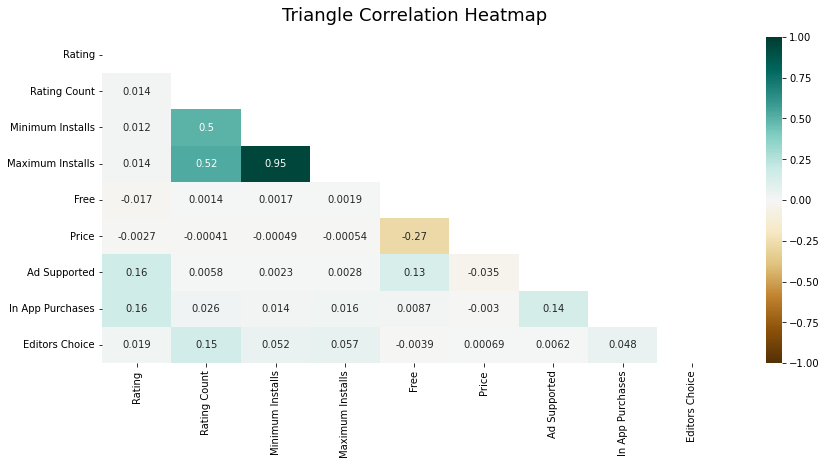

In [31]:
plt.figure(figsize=(14, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

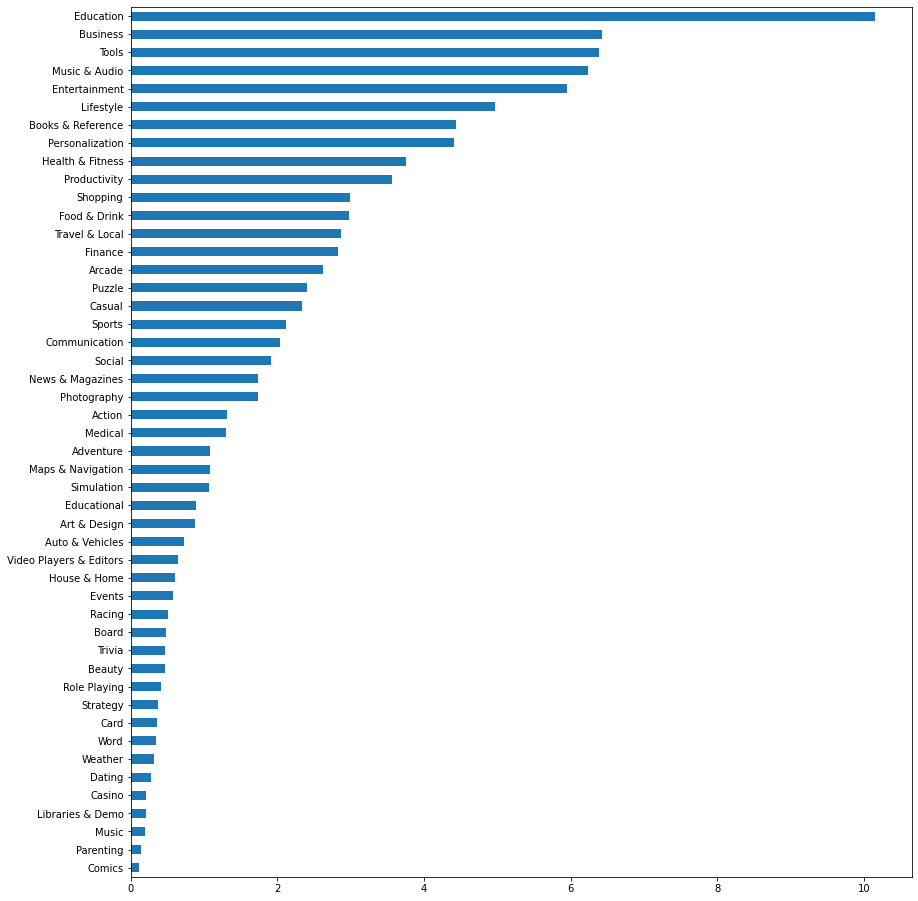

In [32]:
# App category frequency
(df["Category"].value_counts(normalize = True) * 100).plot.barh(figsize = (14,16))
plt.gca().invert_yaxis()

<AxesSubplot:xlabel='Rating'>

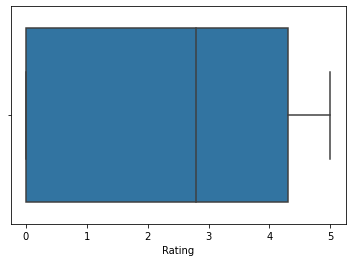

In [33]:
# Rating distribution
sns.boxplot(x = df["Rating"])

In [34]:
df["Rating"].describe()

count   1893274.00000
mean          2.15969
std           2.10575
min           0.00000
25%           0.00000
50%           2.80000
75%           4.30000
max           5.00000
Name: Rating, dtype: float64

In [35]:
df["Rating Count"].describe()

count     1893274.00000
mean         2878.27373
std        206246.75534
min             0.00000
25%             0.00000
50%             5.00000
75%            39.00000
max     138557570.00000
Name: Rating Count, dtype: float64

<AxesSubplot:xlabel='Rating Count'>

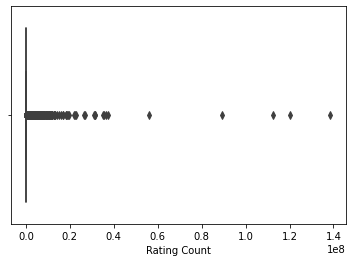

In [36]:
# Rating count distribution
sns.boxplot(x = df["Rating Count"])

In [37]:
# App categories with 0 reviews, counted
df[df["Rating Count"] == 0]["Category"].value_counts().sort_values(ascending = False)

Education                  92320
Business                   80291
Music & Audio              58447
Lifestyle                  52603
Tools                      48042
Entertainment              45271
Health & Fitness           44050
Food & Drink               40353
Books & Reference          38856
Productivity               35181
Shopping                   32650
Personalization            29387
Travel & Local             29241
Finance                    22356
Arcade                     21216
Communication              18603
Casual                     18396
Sports                     17470
Puzzle                     16601
Social                     15990
News & Magazines           13874
Medical                    13852
Photography                11762
Maps & Navigation           9530
Art & Design                8544
Action                      8014
Events                      7760
House & Home                7288
Educational                 6961
Auto & Vehicles             6850
Adventure 

In [38]:
# Maximum number of installs summarized: average, median, mode
df["Maximum Installs"].describe()

count       1893274.00000
mean         336701.15468
std        23704299.03151
min               0.00000
25%              77.00000
50%             619.00000
75%            6589.00000
max     12057627016.00000
Name: Maximum Installs, dtype: float64

In [39]:
# Applications with more than zero installs and reviews
df = df[(df["Maximum Installs"] > 0) & (df["Rating Count"] > 0)]

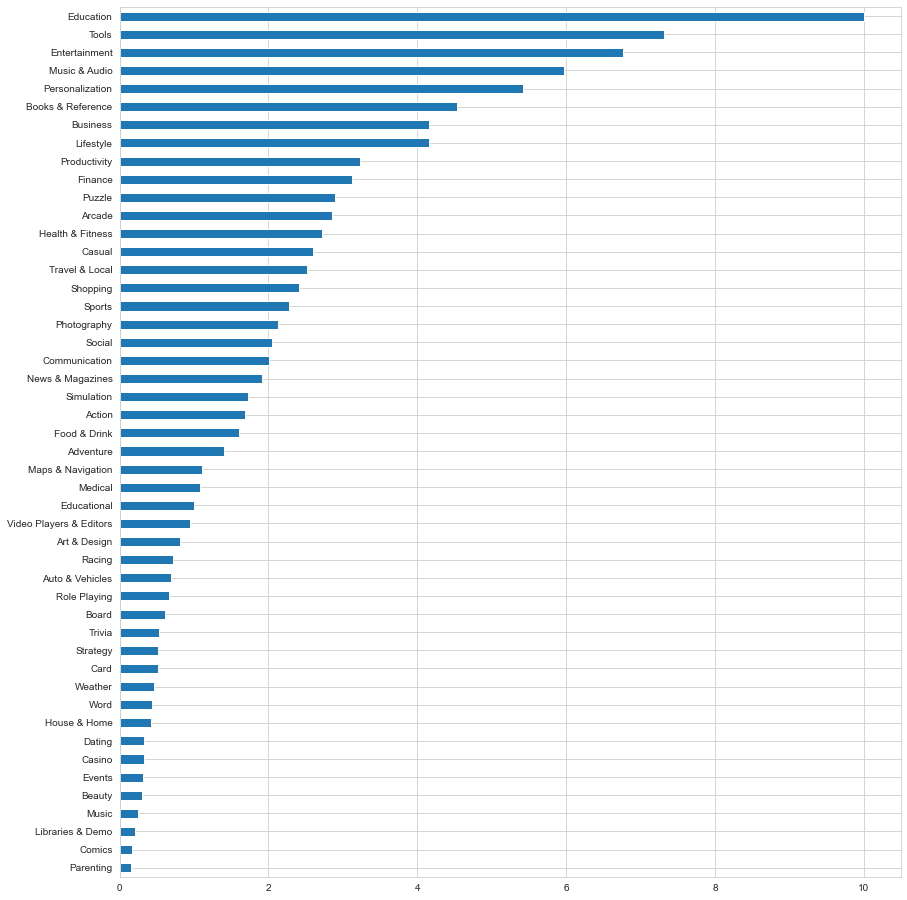

In [40]:
# Category frequency
sns.set_style("whitegrid")
(df["Category"].value_counts(normalize = True) * 100).plot.barh(figsize = (14,16))
plt.gca().invert_yaxis()

<AxesSubplot:ylabel='Category'>

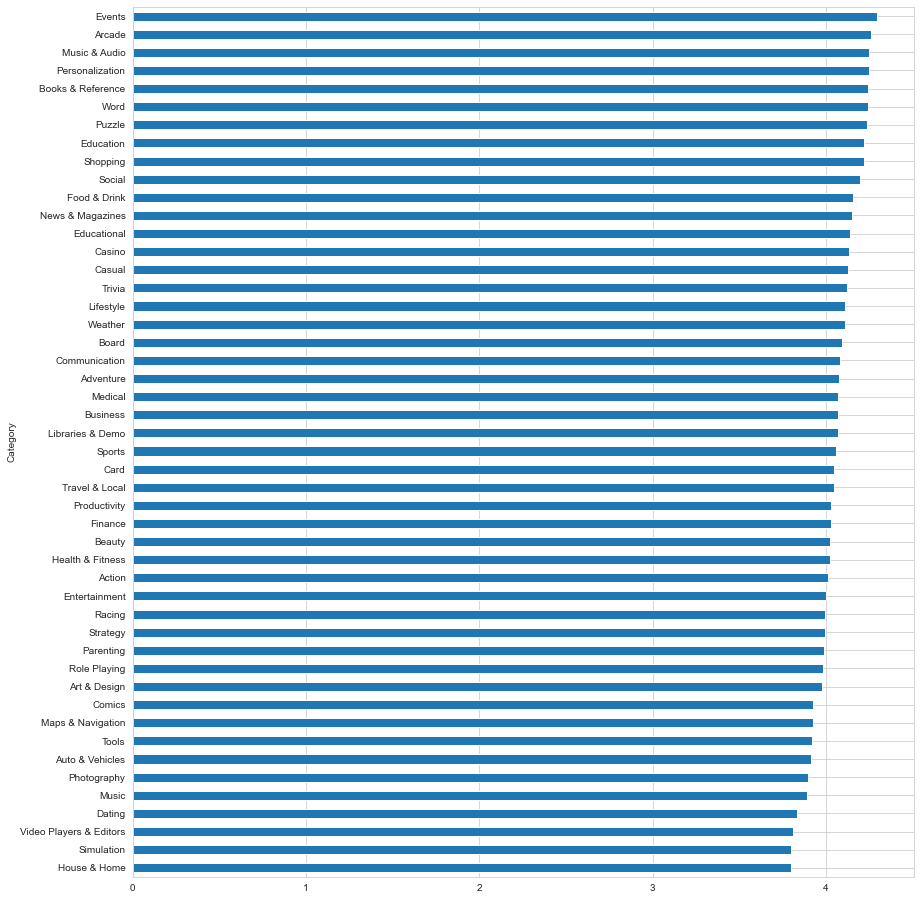

In [41]:
# Category rating average
categories_grouped = df.groupby("Category")
categories_grouped["Rating"].mean().sort_values(ascending = True).plot.barh(figsize = (14,16))

In [42]:
df.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Developer Id', 'Released', 'Last Updated', 'Content Rating',
       'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

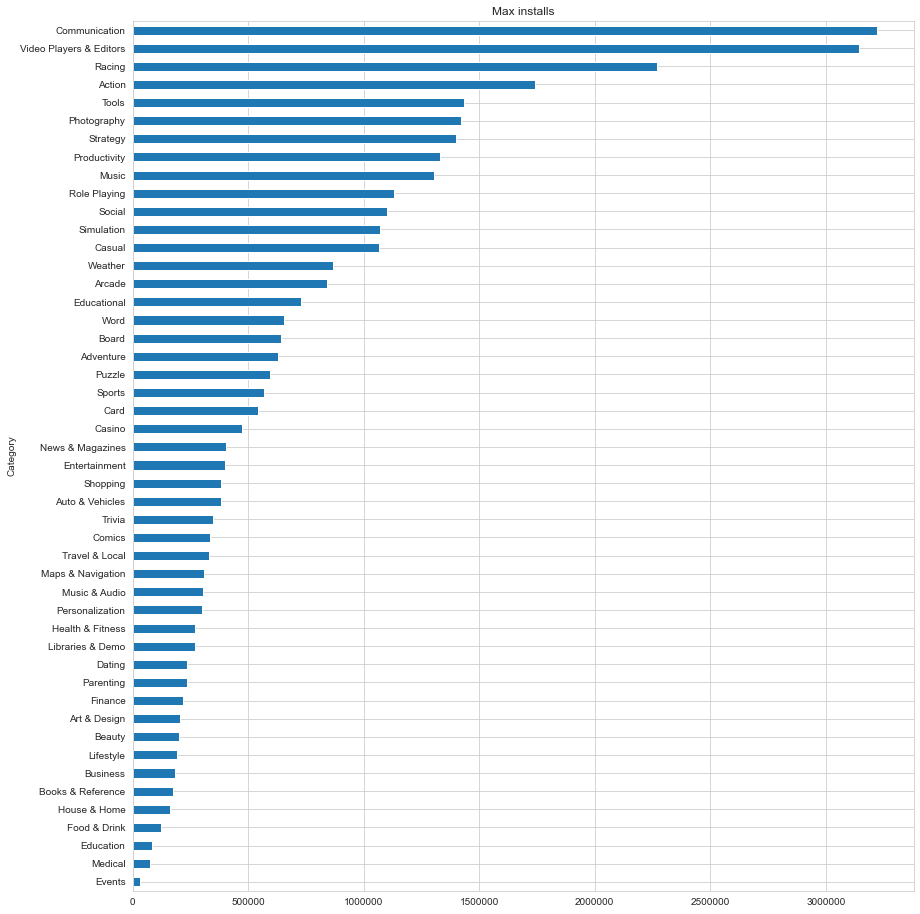

In [43]:
# Categories with maximum installs, average
categories_grouped["Maximum Installs"].mean().sort_values(ascending = True).plot.barh(figsize = (14,16))
plt.ticklabel_format(style='plain', axis = "x")
plt.title("Max installs")
plt.show()

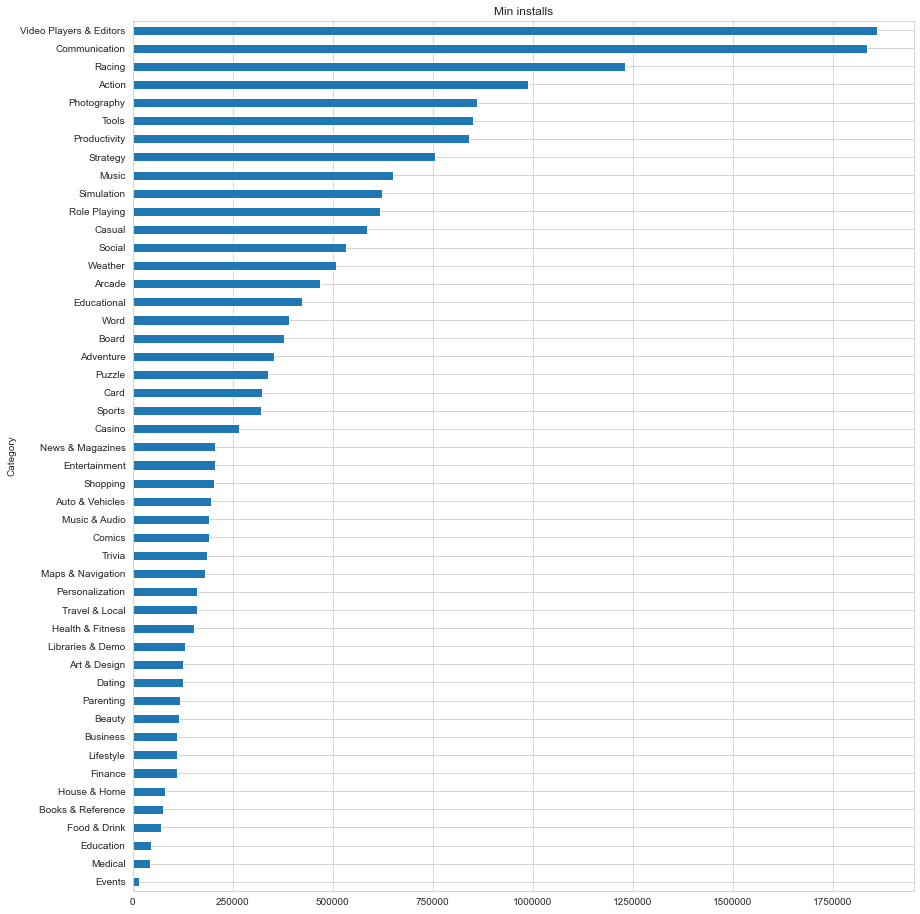

In [44]:
# Categories with highest minimum installs, average
categories_grouped["Minimum Installs"].mean().sort_values(ascending = True).plot.barh(figsize = (14,16))
plt.ticklabel_format(style='plain', axis = "x")
plt.title("Min installs")
plt.show()

<AxesSubplot:>

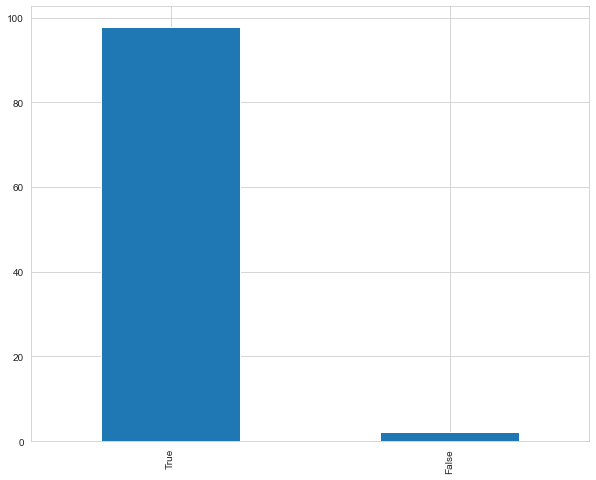

In [45]:
# Free vs. Paid apps

# Free apps: True
# Paid apps: False
(df["Free"].value_counts(normalize = True) * 100).plot.bar(figsize = (10,8))

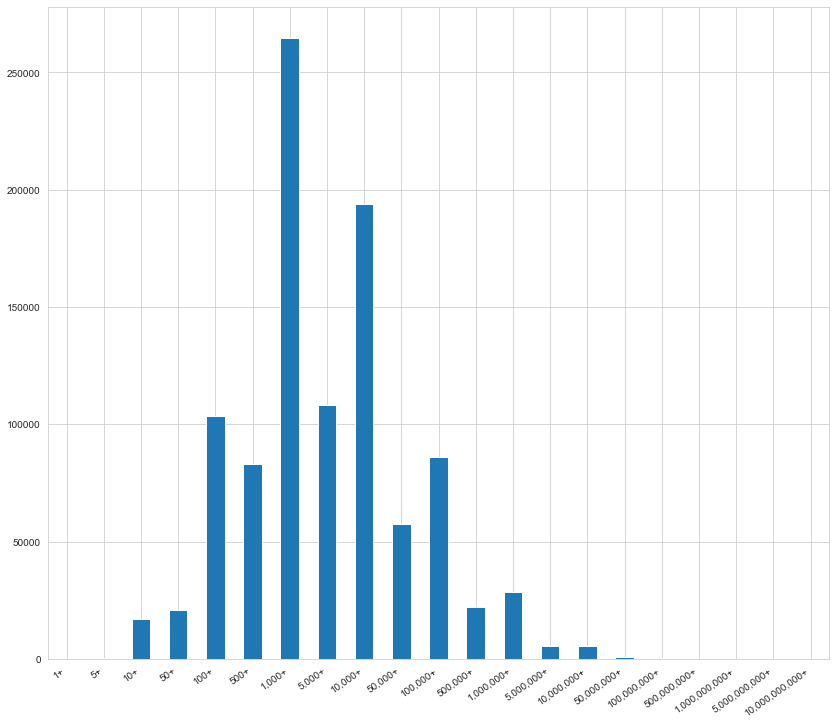

In [46]:
series = df["Installs"].value_counts().iloc[[16, 15, 10, 9, 3, 5, 0, 2, 1, 6, 4, 8, 7, 11, 12, 13, 14, 17, 18, 19, 20]]
series.plot.bar(figsize = (14, 12))
plt.xticks(rotation = 35, ha = "right")
plt.show()

In [47]:
game_categories = [
                        'Puzzle', 
                        'Arcade', 
                        'Simulation', 
                        'Action', 
                        'Adventure', 
                        'Racing', 
                        'Role Playing', 
                        'Board', 
                        'Strategy', 
                        'Casino', 
                        'Card', 
                        'Word', 
                        'Trivia',
                        'Casual',
                 ]
                   
# Define function for separating the various game categories from non game categories
# If any of the below is true, it will return true, otherwise any all other categories will be be considered not a game category
def game(row):
    if row == "Puzzle":
        return True
    if row == "Arcade":
        return True
    if row == "Simulation":
        return True
    if row == "Action":
        return True
    if row == "Adventure":
        return True
    if row == "Racing":
        return True
    if row == "Role Playing":
        return True
    if row == "Board":
        return True
    if row == "Strategy":
        return True
    if row == "Casino":
        return True
    if row == "Card":
        return True
    if row == "Word":
        return True
    if row == "Trivia":
        return True
    if row == "Casual":
        return True
    else:
        return False

In [48]:
# APply function
df["Game"] = df["Category"].apply(game)


In [49]:
df.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Game
1,Ampere Battery Info,Tools,4.40000,64.00000,"5,000+",5000.00000,7662,True,0.00000,USD,Webserveis,"May 21, 2020","May 06, 2021",Everyone,True,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.00000,5.00000,10+,10.00000,19,True,0.00000,USD,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,False
6,unlimited 4G data prank free app,Libraries & Demo,4.50000,12.00000,"1,000+",1000.00000,2567,True,0.00000,USD,android developer779,"Sep 23, 2019","Sep 27, 2019",Everyone,True,False,False,False
7,The Everyday Calendar,Lifestyle,2.00000,39.00000,500+,500.00000,702,True,0.00000,USD,Mozaix LLC,"Jun 21, 2019","Jun 21, 2019",Everyone,False,False,False,False
9,Neon 3d Iron Tech Keyboard Theme,Personalization,4.70000,820.00000,"50,000+",50000.00000,62433,True,0.00000,USD,Free 2021 Themes for Emoji keyboard,"Sep 22, 2019","Oct 07, 2020",Everyone,True,False,False,False


In [50]:
df["Ad Supported"].value_counts(normalize = True) * 100

True    58.26094
False   41.73906
Name: Ad Supported, dtype: float64

<AxesSubplot:xlabel='count', ylabel='Category'>

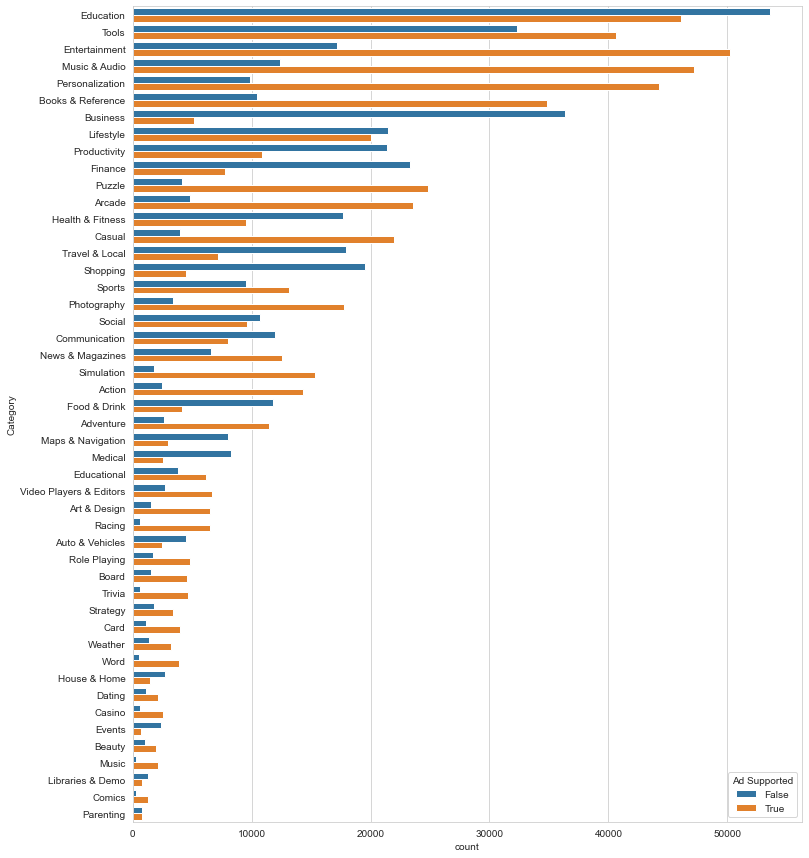

In [51]:
fig, ax = plt.subplots(figsize = (12, 15))
sns.countplot(y = "Category", hue = "Ad Supported", data = df, order = df["Category"].value_counts().index)
#plt.xticks(rotation = 25, ha = "right")

In [52]:
df.groupby("Editors Choice")["Rating"].mean()

Editors Choice
False   4.09795
True    4.34309
Name: Rating, dtype: float64

In [53]:
df.groupby("Editors Choice")["Maximum Installs"].mean()

Editors Choice
False     590170.60411
True    72541795.14414
Name: Maximum Installs, dtype: float64

In [54]:
editors_choice = df[df["Editors Choice"] == True].copy()
editors_choice.shape[0]

666

<AxesSubplot:>

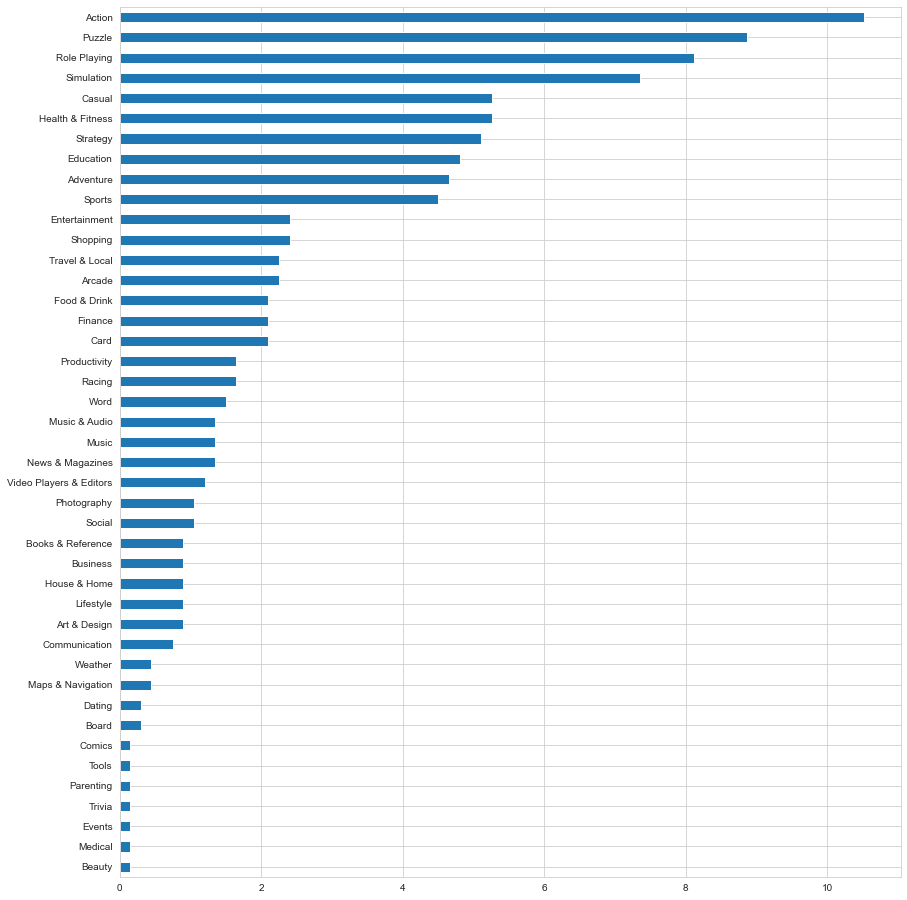

In [55]:
(editors_choice["Category"].value_counts(normalize = True) * 100).sort_values(ascending = True).plot.barh(figsize = (14, 16))

In [56]:
df[df["Category"] == "Sports"].sample(10)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Game
2211475,Badminton,Sports,4.30000,1115.00000,"100,000+",100000.00000,159998,True,0.00000,USD,Digital Sports and Eentertainment,"Apr 14, 2014","Nov 16, 2020",Teen,True,False,False,False
1320984,Gilli Danda - an ancient Desi game,Sports,2.90000,8.00000,"5,000+",5000.00000,7174,True,0.00000,USD,Gamesh Pvt Ltd,"Jan 4, 2020","Jan 11, 2020",Everyone,True,False,False,False
2067379,BPL: Burhani Premier League Season 4,Sports,4.70000,6.00000,100+,100.00000,436,True,0.00000,USD,XCEL Solutions Corp,"Jun 24, 2019","Jul 15, 2019",Teen,True,False,False,False
561869,Beach Bowling,Sports,3.70000,41.00000,"10,000+",10000.00000,14481,True,0.00000,USD,TWJ enterprise,"Dec 3, 2014","Aug 27, 2016",Everyone,True,False,False,False
76963,Eagles - Football Live Score & Schedule,Sports,4.10000,9.00000,500+,500.00000,592,True,0.00000,USD,Sport Games Scores,"Jul 25, 2019","Jun 12, 2021",Everyone,True,False,False,False
2120915,GolfWire Golf Handicap Tool,Sports,3.90000,19.00000,"1,000+",1000.00000,4091,True,0.00000,USD,GolfWire,"Aug 25, 2015","Sep 07, 2016",Everyone,False,False,False,False
36221,Passion for Napoli,Sports,4.70000,33.00000,"1,000+",1000.00000,1280,True,0.00000,USD,Gamon Software,"Dec 23, 2015","Jun 04, 2021",Everyone,True,False,False,False
1369412,Forest Golf,Sports,3.50000,435.00000,"10,000+",10000.00000,47017,True,0.00000,USD,Mirador Studio,"Mar 14, 2013","Dec 22, 2014",Everyone,True,False,False,False
1024564,Football Kicks Strike Score: Soccer Games Hero,Sports,4.10000,5352.00000,"1,000,000+",1000000.00000,1475059,True,0.00000,USD,Mini Sports,"Sep 3, 2020","Jun 11, 2021",Everyone,True,True,False,False
767893,Mini Golf Game 3D,Sports,3.90000,2166.00000,"100,000+",100000.00000,357072,True,0.00000,USD,EivaaGames,"Jan 13, 2016","May 10, 2021",Everyone,True,True,False,False


In [57]:
# df.to_csv("google_apps_cleaned.csv", index = False)
# No need to run multiple times